# AI Exam (Ex 1)

An advanced aquatic drone, is deployed to collect critical data on marine biodiversity in a coastal region. The drone starts at point $S$, located near the shore, and must navigate to point $G$, a designated marine research site rich in coral reefs and sea life. Along the way, the drone must carefully maneuver through dynamic underwater environments, avoiding hazards and optimizing its energy usage.

The environment includes:  
1. **(O) Open Water:** Normal movement; no additional challenges.  
3. **(F) Seaweed Forests:** Dense vegetation that slows the drone, incurring extra energy costs per move.    
5. **(E) Energy Stations:** Specific points where the drone can recharge its battery, reducing the total cost of the navigation.  


<img src="images/env_ex1.png" style="zoom: 20%;"/>



### Environment Details:

- **Single state problem**: *Actions* are all deterministic, *State* is fully observable. 
- **Grid Representation:** The environment is represented as in the above image (a grid 10x10).  
- $S$ - Start state: The drone's starting point at (0, 0).  
- $G$ - Goal state: the marine research site at (9, 7).
- **Movement Costs:** Each move has a default energy cost of 1.  
- **Hazards:**  
  - **Seaweed Forests:** Entering these zones incurs an additional positive cost.
- **Energy Stations:** Provide a reduction cost when visited, however reaching these cells may require the agent to move far from the goal.  

You can use the following code to explore better the environment

In [2]:
import os, sys 
import tqdm

module_path = os.path.abspath(os.path.join('tools'))
if module_path not in sys.path:
    sys.path.append(module_path)

import gym, envs
from utils.ai_lab_functions import *
import numpy as np
from timeit import default_timer as timer
from tqdm import tqdm as tqdm

env_name = 'AquaticEnv-v0'
env = gym.make(env_name)

env.render()

print("\nActions encoding: ", env.actions)

# Remember that you can know the type of a cell whenever you need by accessing the grid element of the environment:
print("Cell type of start state: ",env.grid[env.startstate])
print("Cell type of goal state: ",env.grid[env.goalstate])
state = 3 # forest
print(f"Cell type of cell {env.state_to_pos(state)}: ",env.grid[state])
state = 17 # energy station
print(f"Cell type of cell {env.state_to_pos(state)}: ",env.grid[state])

[['S' 'O' 'O' 'F' 'F' 'F' 'F' 'O' 'O' 'O']
 ['O' 'F' 'O' 'O' 'O' 'O' 'F' 'E' 'F' 'O']
 ['O' 'O' 'F' 'F' 'F' 'O' 'F' 'F' 'F' 'O']
 ['F' 'O' 'F' 'F' 'E' 'O' 'F' 'O' 'F' 'O']
 ['F' 'O' 'F' 'F' 'F' 'O' 'F' 'O' 'F' 'O']
 ['F' 'E' 'F' 'O' 'O' 'O' 'F' 'E' 'F' 'O']
 ['O' 'O' 'O' 'O' 'O' 'O' 'F' 'F' 'F' 'O']
 ['O' 'F' 'F' 'F' 'O' 'O' 'O' 'F' 'F' 'O']
 ['O' 'O' 'O' 'O' 'F' 'F' 'F' 'F' 'F' 'O']
 ['F' 'F' 'F' 'O' 'O' 'O' 'O' 'G' 'O' 'F']]

Actions encoding:  {0: 'L', 1: 'R', 2: 'U', 3: 'D'}
Cell type of start state:  S
Cell type of goal state:  G
Cell type of cell (0, 3):  F
Cell type of cell (1, 7):  E


#### In this exam you should define a **"cost_dict"** dictionary to define the states that have different cost than 1. For instance:

In [3]:
def get_cost(node_state, grid, cost_dict=None):
    if cost_dict is not None and grid[node_state] in cost_dict: 
        return cost_dict[grid[node_state]] 
    
    return 1

In [70]:
# The cost of moving to a cell of type F is 2, and the cost of moving to a cell of type E is -1.
cost_dict = {'F': 2, 'E': -1}

state = 1 #state in position (0,2)
node=Node(state)
action = 1 #move right
child_state = env.sample(node.state, action)
cost = get_cost(child_state, env.grid, cost_dict)
child = Node( 
    child_state, # node state
    node, # parent node
    node.pathcost + cost, # incremental path cost
) 

print(f"The agent starts in {env.state_to_pos(state)} of type {env.grid[state]}, performs the action {env.actions[action]}, and reaches {env.state_to_pos(child.state)} of type {env.grid[child.state]} with cost {child.pathcost}")


state = 2 #state in position (0,2)
node=Node(state)
action = 1 #move right
child_state = env.sample(node.state, action)
cost = get_cost(child_state, env.grid, cost_dict)
child = Node( 
    child_state, # node state
    node, # parent node
    node.pathcost + cost, # incremental path cost
) 

print(f"The agent starts in {env.state_to_pos(state)} of type {env.grid[state]}, performs the action {env.actions[action]}, and reaches {env.state_to_pos(child.state)} of type {env.grid[child.state]} with cost {child.pathcost}")


state = 16 #state in position (0,2)
node=Node(state)
action = 1 #move right
child_state = env.sample(node.state, action)
cost = get_cost(child_state, env.grid, cost_dict)
child = Node( 
    child_state, # node state
    node, # parent node
    node.pathcost + cost, # incremental path cost
) 

print(f"The agent starts in {env.state_to_pos(state)} of type {env.grid[state]}, performs the action {env.actions[action]}, and reaches {env.state_to_pos(child.state)} of type {env.grid[child.state]} with cost {child.pathcost}")

The agent starts in (0, 1) of type O, performs the action R, and reaches (0, 2) of type O with cost 1
The agent starts in (0, 2) of type O, performs the action R, and reaches (0, 3) of type F with cost 2
The agent starts in (1, 6) of type F, performs the action R, and reaches (1, 7) of type E with cost -1


#### Using the desired algorithm, can you find a setting of *cost_dict* for which the solution returned by the algorithm is the one that avoids all the 'F' states and has the lowest cost to reach the goal state? We recall that the state 'F' should have a positive cost, i.e., cost('F')> 0.

In [77]:
#Path finding solution
def present_with_higher_value(queue, node): #ordina la coda per VALORE/Desiderabilita'/valori crescenti di f
    if node.state in queue:
        if queue[node.state].value > node.value: 
            return True
    return False

#all the heuristics
H = Heu.l1_norm #manhattan - best one, closer to h* because of how boat can move
#H = Heu.l2_norm #distanza vettoriale
#H = Heu.chebyshev

def a_star(environment, cost_dict): #graph search, returns (path, time_cost, space_cost)

    queue = PriorityQueue() #frontiera ordinata per euristica
    p1 = environment.state_to_pos(environment.startstate)
    p2 = environment.state_to_pos(environment.goalstate)
    heuristic = H(p1, p2)
    queue.add(Node(environment.startstate, None, 0, heuristic)) #NECESSARIO INIZIALIZZARE CON L'EURISTICA
    
    explored = set()
    time_cost = 1
    space_cost = 1
    
    while True:
        if queue.is_empty(): 
            return None, time_cost, space_cost 
        
        # Retrieve node from the queue
        node = queue.remove()
        if node.state == environment.goalstate:
            return build_path(node), time_cost, space_cost
        
        explored.add(node.state)
        
        # Look around
        for action in range(environment.action_space.n):

            nextState = environment.sample(node.state, action)

            p1 = environment.state_to_pos(nextState)
            p2 = environment.state_to_pos(environment.goalstate)
            heuristic = H(p1, p2)

            stepCost = get_cost(nextState, environment.grid, cost_dict)
            #child = Node(nextState, node, node.pathcost + 1, node.pathcost + 1 + heuristic) #old one, no more uniform cost
            child = Node(nextState, node, node.pathcost + stepCost, node.pathcost + stepCost + heuristic) #variable step cost
            
            time_cost += 1
            
            if child.state not in queue and child.state not in explored:
                queue.add(child)
                
            elif present_with_higher_cost(queue, child):
                queue.replace(child)
                
        space_cost = max(space_cost, len(queue) + len(explored))
    
    return None, time_cost, space_cost

In [78]:
env_name = 'AquaticEnv-v0'
env = gym.make(env_name)

cost_dict = {'F': 4, 'E': -1} #to avoid F states, works with anything over 4
#cost_dict = {'F': 2, 'E': -1} #default
algorithm =  a_star

# remember to pass the cost_dict to your algorithm and use it to compute the cost of the children nodes as shown above
solution, time_cost, space_cost = algorithm(env, cost_dict)

#### You can visualize and test your solution using the following code:

Solution: 
	Path: [(0, 0), (1, 0), (2, 0), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (6, 0), (7, 0), (8, 0), (8, 1), (8, 2), (8, 3), (9, 3), (9, 4), (9, 5), (9, 6), (9, 7)]


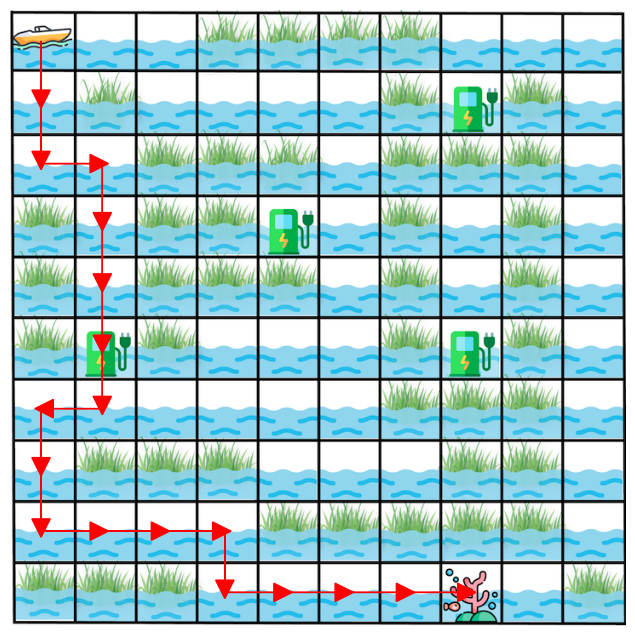

	Time cost: 153
	Space cost: 71

Checking your solution...

Your solution is correct!



In [79]:
# a random solution 
#solution = (0, 1, 2, 3, 13, 23, 24, 25, 35, 45, 55, 65, 75, 76, 77, 87, 97)
#time_cost = 0
#space_cost = 0

print("Solution: ")
path = [env.state_to_pos(s) for s in solution]
print("\tPath:", path)
directions = movements_to_directions(path)
plot_solution(directions, env_name='ex1_render')
print("\tTime cost:", time_cost)
print("\tSpace cost:", space_cost)

print("\nChecking your solution...\n")
valid = check_sol(path)

Perfomances on default:
Manhattan distance: 
Time cost: 105, Space cost: 52

l2 norm:
Time cost: 221, Space cost: 72

chev:
Time cost: 249, Space cost: 77

----------------------------------

Performances on "avoid F" with F = 100: #here F cells are extremely bad, so they are never considered
Manhattan distance: 
Time cost: 153, Space cost: 71

l2 norm:
Time cost: 153, Space cost: 71

chev:
Time cost: 153, Space cost: 71

----------------------------------

Performances on "avoid F" with F = 4: #some F cells could actually be advantageous, so sometimes they are considered (the optimal path still doesn't go through F cells)
Manhattan distance: 
Time cost: 153, Space cost: 71

l2 norm:
Time cost: 189, Space cost: 71

chev:
Time cost: 229, Space cost: 73